In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set()

#### Dataset ini tentang penjualan mobil dari tahun 2007 sampai 2016 dengan berbagai macam brand mobil seperti Hyundai, Honda, Toyota. Dataset ini memiliki 8 fitur diantaranya:

1. name = Nama brand mobil
2. year = Tahun ketika mobil dibeli
3. selling_price = Harga mobil yang terjual
4. km_drive = Kilometer mobil
5. fuel = Jenis bahan bakar mobil (petrol, diesel)
6. seller_type = Memberitahukan apakah Penjual adalah perorangan, dealer, dan dealer yang telah memperoleh sertifikasi atau pengakuan resmi.
7. transmission = Transmisi gigi mobil (manual, automatic).
8. owner = Jumlah pemilik mobil sebelumnya (first owner, second owrner).

Dataset ini memiliki 4.339 data tidak memiliki nilai kosong(null), tetapi terdapat data duplicate sebanyak 763 data

Business Understanding


In [2]:
data = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


# Data Understanding

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
data.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [5]:
# Cek apakah terdapat nilai kosong (null)
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
# Cek apakah terdapat data duplicate
data_duplicate = data.duplicated().sum()
print(f"Jumalah data duplicate sebanyak {data_duplicate} data")

Jumalah data duplicate sebanyak 763 data


In [7]:
# Hapus data duplicate
data = data.drop_duplicates()
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


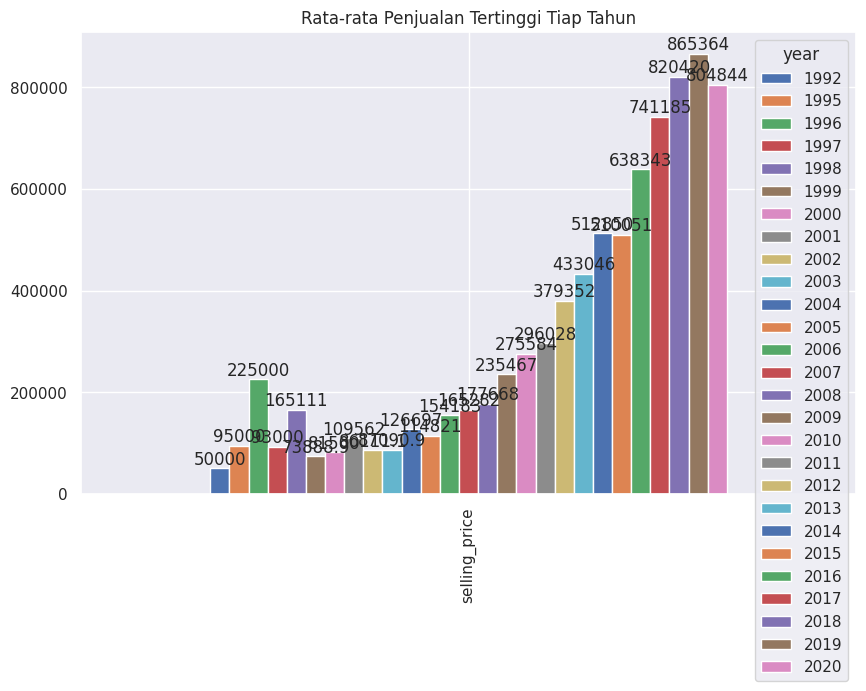

In [8]:
plot2 = pd.pivot_table(data, values="selling_price", columns="year", aggfunc="mean")
# Plot bar chart dengan sedikit jarak antar batang
ax = plot2.plot.bar(width=1, figsize=(10, 6))  # Atur width untuk mengurangi lebar batang
ax.set_title('Rata-rata Penjualan Tertinggi Tiap Tahun')

for container in ax.containers:
    ax.bar_label(container)

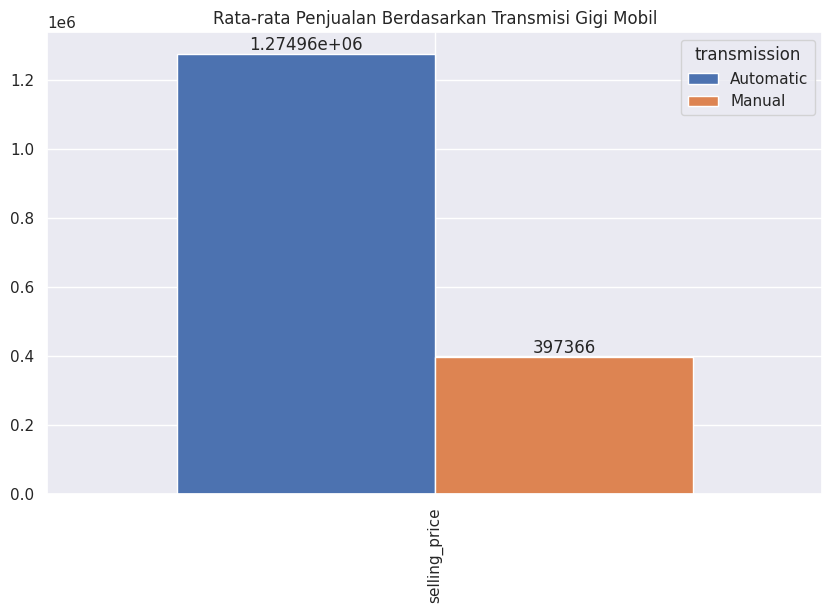

In [9]:
plot2 = pd.pivot_table(data, values="selling_price", columns="transmission", aggfunc="mean")
# Plot bar chart dengan sedikit jarak antar batang
ax = plot2.plot.bar(width=1, figsize=(10, 6))  # Atur width untuk mengurangi lebar batang
ax.set_title('Rata-rata Penjualan Berdasarkan Transmisi Gigi Mobil')

for container in ax.containers:
    ax.bar_label(container)

In [10]:
data.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

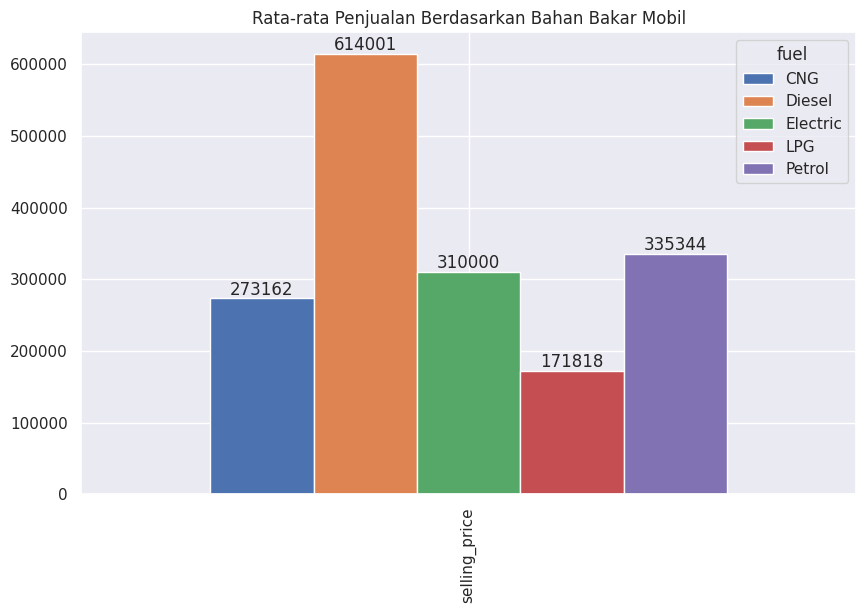

In [11]:
plot2 = pd.pivot_table(data, values="selling_price", columns="fuel", aggfunc="mean")
# Plot bar chart dengan sedikit jarak antar batang
ax = plot2.plot.bar(width=1, figsize=(10, 6))  # Atur width untuk mengurangi lebar batang
ax.set_title('Rata-rata Penjualan Berdasarkan Bahan Bakar Mobil')

for container in ax.containers:
    ax.bar_label(container)

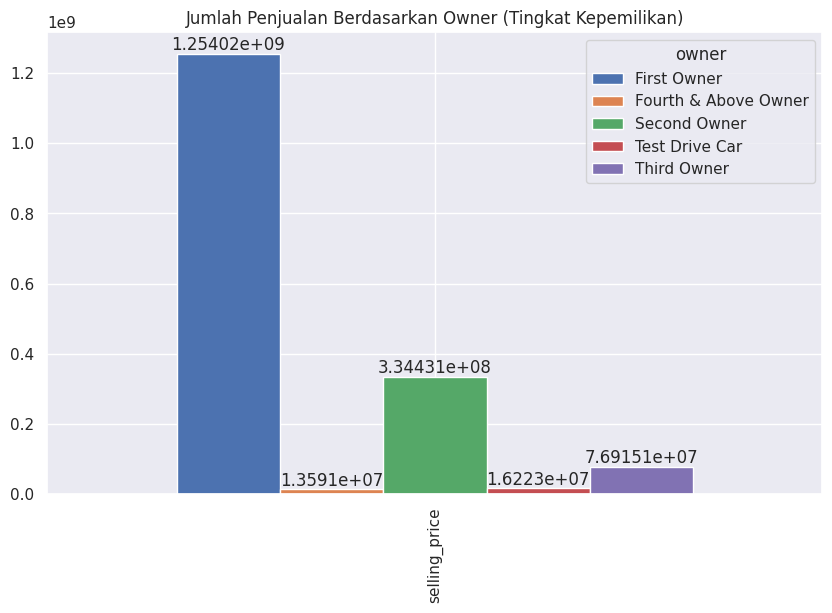

In [12]:
plot2 = pd.pivot_table(data, values="selling_price", columns="owner", aggfunc="sum")
# Plot bar chart dengan sedikit jarak antar batang
ax = plot2.plot.bar(width=1, figsize=(10, 6))  # Atur width untuk mengurangi lebar batang
ax.set_title('Jumlah Penjualan Berdasarkan Owner (Tingkat Kepemilikan)')

for container in ax.containers:
    ax.bar_label(container)

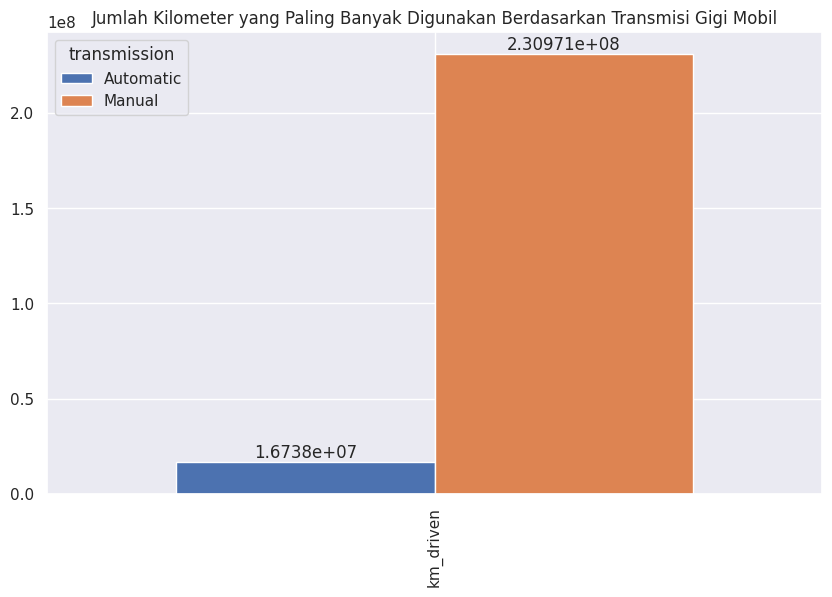

In [13]:
plot2 = pd.pivot_table(data, values="km_driven", columns="transmission", aggfunc="sum")
# Plot bar chart dengan sedikit jarak antar batang
ax = plot2.plot.bar(width=1, figsize=(10, 6))  # Atur width untuk mengurangi lebar batang
ax.set_title('Jumlah Kilometer yang Paling Banyak Digunakan Berdasarkan Transmisi Gigi Mobil')

for container in ax.containers:
    ax.bar_label(container)

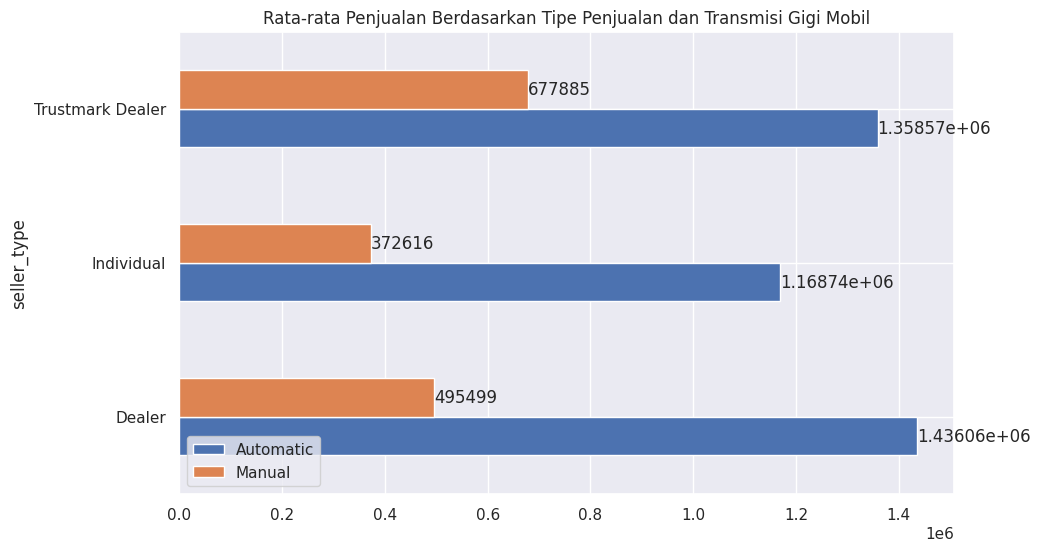

In [14]:
plot = data.groupby(["seller_type", "transmission"])["selling_price"].mean().unstack()
ax = plot.plot.barh(figsize=(10, 6))
ax.set_title("Rata-rata Penjualan Berdasarkan Tipe Penjualan dan Transmisi Gigi Mobil")
ax.legend(loc="lower left")

for container in ax.containers:
    ax.bar_label(container)

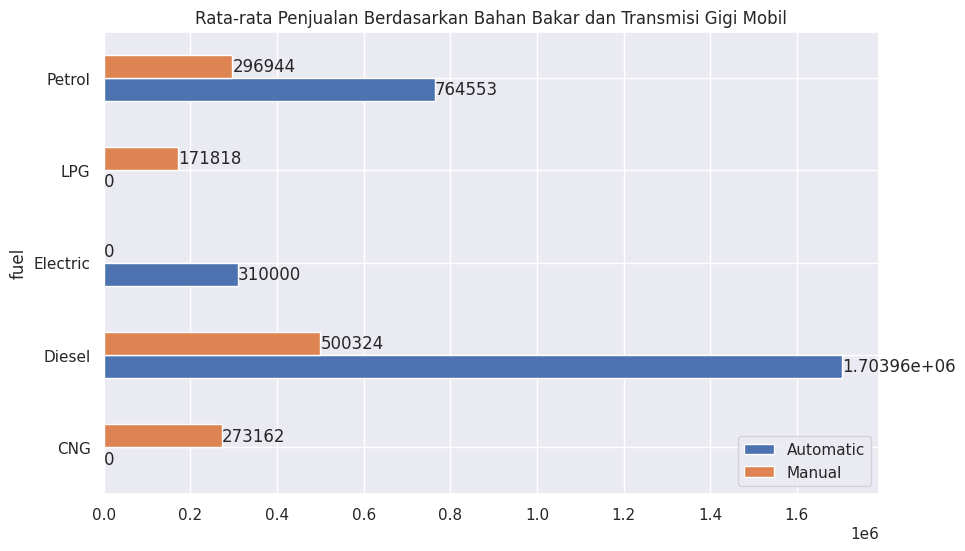

In [15]:
plot = data.groupby(["fuel", "transmission"])["selling_price"].mean().unstack()
ax = plot.plot.barh(figsize=(10, 6))
ax.set_title("Rata-rata Penjualan Berdasarkan Bahan Bakar dan Transmisi Gigi Mobil")
ax.legend(loc="lower right")

for container in ax.containers:
    ax.bar_label(container)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


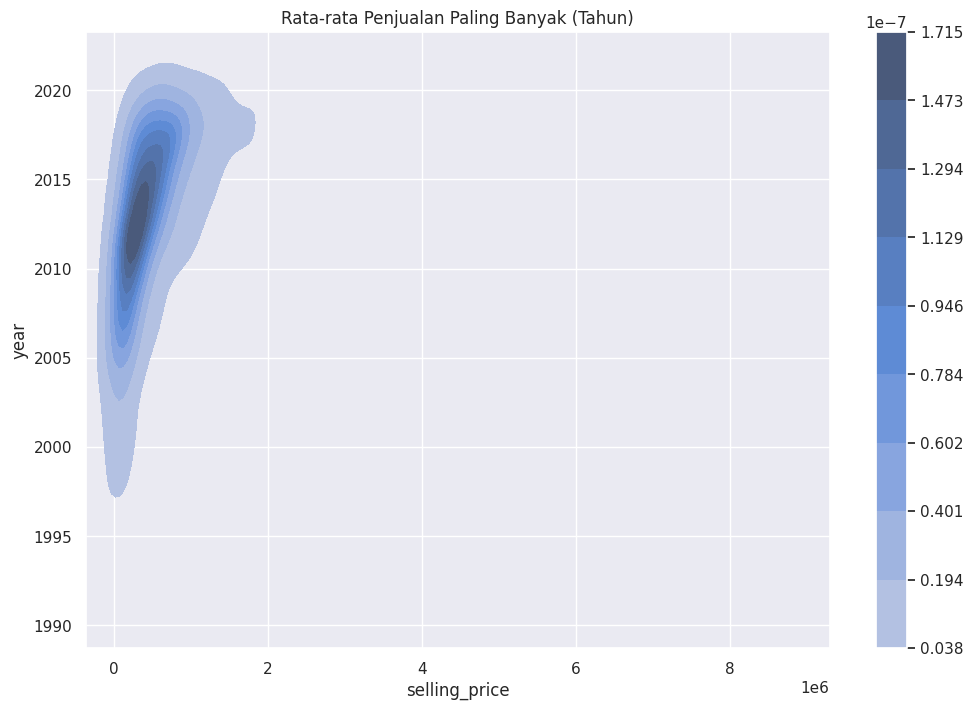

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
sns.kdeplot(data=data, x="selling_price", y="year", cbar=True, fill=True)
plt.title("Rata-rata Penjualan Paling Banyak (Tahun)")
plt.show()

In [17]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [18]:
# Label Encoding pada fitur untuk melihat korelasi pada dataset dan melakukan penghapusan outlier
# Hasilnya misal pada fitur owner akan menghasilkan 0 itu berarti 0 adalah first owner dan 2 adalah second owner dan begitupun seterusnya
list_columns = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner']
for x in list_columns:
    label_encoder = LabelEncoder()
    data[x] = label_encoder.fit_transform(data[x])
data

/tmp/ipykernel_23/2533598210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x] = label_encoder.fit_transform(data[x])
/tmp/ipykernel_23/2533598210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x] = label_encoder.fit_transform(data[x])
/tmp/ipykernel_23/2533598210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,13,60000,70000,4,1,1,0
1,1041,13,135000,50000,4,1,1,0
2,505,18,600000,100000,1,1,1,0
3,118,23,250000,46000,4,1,1,0
4,279,20,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,602,20,409999,80000,1,1,1,2
4336,601,20,409999,80000,1,1,1,2
4337,777,15,110000,83000,4,1,1,2
4338,381,22,865000,90000,1,1,1,0


In [ ]:
data['']

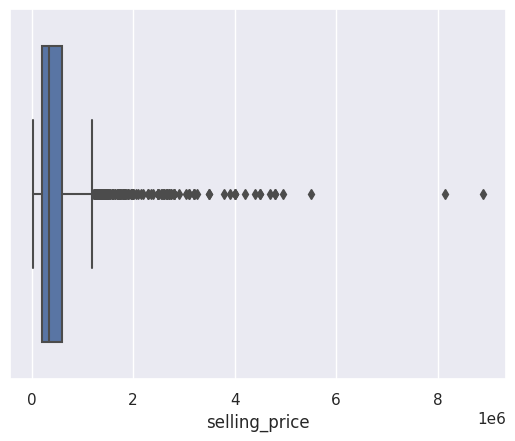

In [19]:
# Menampilkan outlier pada fitur
sns.boxplot(x="selling_price", data=data);

In [20]:
# Melakukan penghapusan nilai outlier (nilai yang tidak wajar pada sebuah fitur dataset)

data_baru = pd.DataFrame(data["selling_price"], columns=["selling_price"])

limit = 1 # Limit ini diatur untuk menyesuaikan rentang outlier
outliers = []

# Loop untuk mendeteksi outlier berdasarkan Z-Score
for col in data_baru.columns:
    subset = data_baru[col]
    mean_val = np.mean(subset)
    stan_dev = np.std(subset)

    for idx in subset.index:
        z_score = (subset[idx] - mean_val) / stan_dev
        if np.abs(z_score) > limit:
            if idx not in outliers:
                outliers.append(idx)

# Menghapus baris outlier dari data_baru
hasil = data_baru.drop(index=outliers)

# Menampilkan hasil
print("Outlier yang dihapus adalah:", len(outliers))
print("Indeks outlier:", outliers)
print("Data setelah penghapusan outlier:\n", hasil)

Outlier yang dihapus adalah: 277
Indeks outlier: [12, 27, 29, 30, 32, 35, 36, 39, 40, 43, 44, 46, 88, 89, 94, 96, 99, 101, 102, 103, 105, 133, 163, 191, 204, 212, 213, 218, 227, 234, 244, 263, 289, 291, 318, 319, 320, 321, 345, 393, 397, 399, 410, 421, 431, 461, 465, 527, 534, 536, 537, 538, 539, 548, 550, 551, 553, 554, 555, 563, 566, 644, 711, 721, 731, 738, 744, 757, 770, 771, 796, 828, 836, 838, 852, 945, 959, 963, 968, 969, 972, 974, 975, 979, 988, 997, 1002, 1019, 1022, 1024, 1026, 1042, 1057, 1060, 1065, 1075, 1078, 1080, 1081, 1088, 1107, 1112, 1115, 1156, 1169, 1202, 1214, 1217, 1282, 1288, 1290, 1303, 1311, 1325, 1330, 1362, 1406, 1410, 1417, 1441, 1453, 1462, 1471, 1478, 1479, 1530, 1532, 1537, 1560, 1591, 1593, 1623, 1626, 1646, 1703, 1705, 1716, 1719, 1770, 1775, 1777, 1778, 1780, 1795, 1798, 1914, 1915, 1963, 1974, 2032, 2034, 2044, 2062, 2129, 2138, 2140, 2154, 2212, 2291, 2293, 2295, 2299, 2348, 2350, 2351, 2358, 2359, 2404, 2406, 2425, 2428, 2466, 2482, 2499, 2503, 259

<Axes: xlabel='selling_price'>

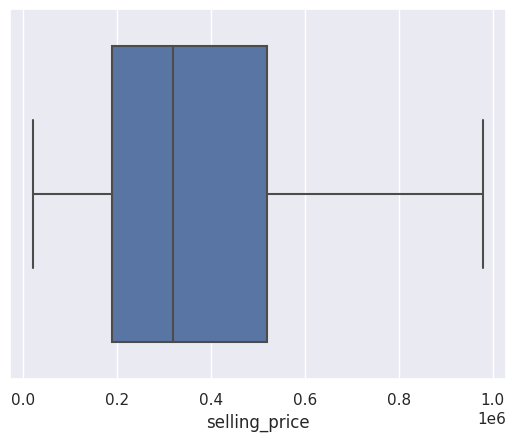

In [21]:
sns.boxplot(data=hasil, x="selling_price")

# Modeling